<a href="https://colab.research.google.com/github/leenu10/Data_Preprocessing/blob/main/LeenuMathewWeek10Casestudy_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case study on Pre-processing of Titanic Dataset

---



In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Load the dataset into python environment**

In [ ]:
data = pd.read_csv('/content/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **2. Make ‘PassengerId’ as the index** 

In [ ]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3. Check the basic details of the dataset**

In [ ]:
data.shape

(891, 11)

The dataset contains 891 rows and 11 columns.

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here, the columns, 


1. 'Survived' indicates survived or not.
(0 = No, 1 = Yes)
1. 'Pclass' indicates Ticket class.
(1 = 1st, 2 = 2nd, 3 = 3rd)
1. 'Name' indicates Name of the passenger
2.  'Sex' indicates the Sex of the passenger.(male or female)
1. 'Age' indicates Age in years.
2. 'SibSp' indicates no.of siblings or spouses aboard the Titanic.
1. 'Parch' indicates no.of parents or children aboard the Titanic.
1. 'Ticket' indicates the ticket number.
2. 'Fare' indicates the passenger fare.
1. 'Cabin' indicates the cabin number.
2. 'Embarked' indicates port of Embarkation.(	C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The columns 'Age', 'Cabin', 'Embarked' contains missing values. Also the data types of the variables can be noted.

In [ ]:
data[['Age','Fare','SibSp','Parch']].describe() 

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [ ]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
data.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

In [ ]:
data['Name'].nunique()

891

Thus there are no duplicate values in the dataset.

## **4. Fill in all the missing values present in all the columns in the dataset**

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# percentage of missing values 

missing = data.isnull().sum()
missing[missing>0]/len(data)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Since cabin contains more than 50% missing values, we can drop it. 

Since Age is a quantitative data, lets fill it with the mean and being a qualitative data, filling 'Embarked' with mode.

In [ ]:
data = data.drop('Cabin', axis=1)
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# filling in the missing values of Age

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [ ]:
# Filling in the missing values of Fare

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## **5. Check and handle outliers in at least 3 columns in the dataset**


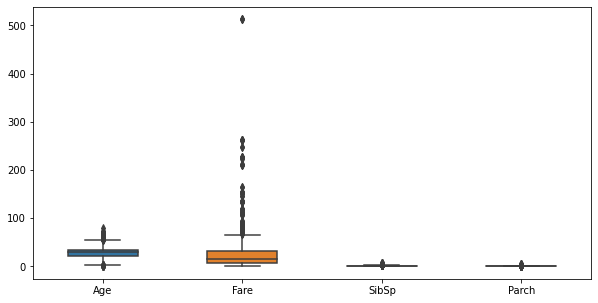

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
list = ['Age', 'Fare', 'SibSp', 'Parch']
sns.boxplot(data = data[list], width=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


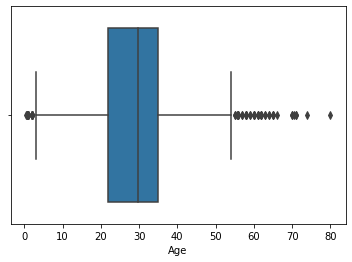

In [ ]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


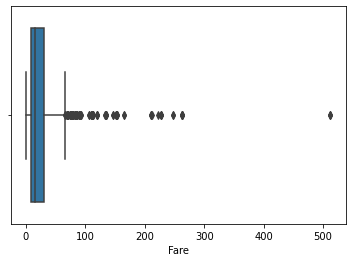

In [ ]:
sns.boxplot(data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


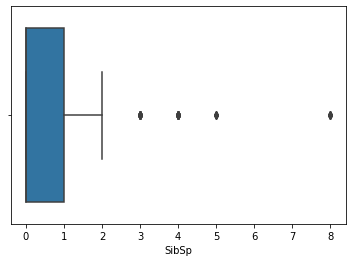

In [ ]:
sns.boxplot(data['SibSp'])

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
# handling outliers of Age

q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

iqr = q3 - q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [ ]:
print('low_lim = ', low_lim)
print('up_lim = ', up_lim)

low_lim =  2.5
up_lim =  54.5


In [ ]:
outlier = []
for x in data['Age']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)
#outlier

In [ ]:
len(outlier)

66

In [ ]:
age_outliers = (data['Age']<low_lim)|(data['Age']>up_lim)
data.loc[age_outliers].index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880], inplace=True)

In [ ]:
data.shape

(825, 10)

In [ ]:
# Handling outliers of Fare

q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

iqr = q3 - q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [ ]:
print('low_lim = ', low_lim)
print('up_lim = ', up_lim)

low_lim =  -25.366699999999994
up_lim =  63.333299999999994


In [ ]:
outlier = []
for x in data['Fare']:
  if ((x<low_lim)or(x>up_lim)):
    outlier.append(x)
#outlier

In [ ]:
fare_outliers = (data['Fare'] < low_lim) | (data['Fare'] > up_lim)
data.loc[fare_outliers].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [ ]:
data.drop(data.loc[fare_outliers].index, inplace = True)

In [ ]:
data.shape

(718, 10)

In [ ]:
# Handling outliers of SibSp

q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')

iqr = q3 - q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [ ]:
print('low_lim = ', low_lim)
print('up_lim = ', up_lim)

low_lim =  -1.5
up_lim =  2.5


In [ ]:
outlier = []
for x in data['SibSp']:
  if ((x<low_lim)or(x>up_lim)):
    outlier.append(x)
#outlier

In [ ]:
SibSp_outliers = (data['SibSp'] < low_lim) | (data['SibSp'] > up_lim)
data.loc[SibSp_outliers].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851], inplace = True)

In [ ]:
data.shape

(689, 10)

## **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [ ]:
from sklearn import preprocessing

In [ ]:
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))

In [ ]:
data[['Age', 'Fare']] = minmax.fit_transform(data[['Age', 'Fare']])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,0.372549,1,0,A/5 21171,0.118118,S
3,1,3,"Heikkinen, Miss. Laina",female,0.450980,0,0,STON/O2. 3101282,0.129115,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.627451,1,0,113803,0.865114,S
5,0,3,"Allen, Mr. William Henry",male,0.627451,0,0,373450,0.131152,S
6,0,3,"Moran, Mr. James",male,0.523512,0,0,330877,0.137804,Q
